In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/kaggle/kaggle.json

chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:05<00:00, 168MB/s]
100% 812M/812M [00:07<00:00, 118MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed file

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


In [ ]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


In [ ]:
import os

# counting the number of files in the train folder

path,dirs, files = next(os.walk('/content/train'))

file_count = len(files)

print('No of images: ',file_count)

No of images:  25000


In [ ]:
# Printing the name of images

file_names = os.listdir('/content/train')

print('file names: ', file_names)

file names:  ['dog.8877.jpg', 'cat.10602.jpg', 'dog.2270.jpg', 'dog.5980.jpg', 'cat.10687.jpg', 'dog.7145.jpg', 'cat.8508.jpg', 'dog.1063.jpg', 'dog.9664.jpg', 'dog.609.jpg', 'dog.6523.jpg', 'cat.6806.jpg', 'cat.1553.jpg', 'cat.1686.jpg', 'cat.8540.jpg', 'dog.2952.jpg', 'dog.3150.jpg', 'cat.8259.jpg', 'dog.4726.jpg', 'cat.5379.jpg', 'cat.3139.jpg', 'dog.7774.jpg', 'dog.4971.jpg', 'cat.6996.jpg', 'cat.6535.jpg', 'dog.6646.jpg', 'cat.11014.jpg', 'cat.1850.jpg', 'cat.10472.jpg', 'cat.2329.jpg', 'dog.3282.jpg', 'cat.3438.jpg', 'cat.5261.jpg', 'dog.636.jpg', 'dog.1190.jpg', 'dog.10838.jpg', 'dog.458.jpg', 'dog.12171.jpg', 'dog.9561.jpg', 'dog.9239.jpg', 'dog.10062.jpg', 'dog.774.jpg', 'cat.1405.jpg', 'cat.11382.jpg', 'dog.11256.jpg', 'dog.441.jpg', 'cat.10980.jpg', 'dog.1307.jpg', 'cat.11216.jpg', 'dog.11723.jpg', 'cat.7030.jpg', 'dog.3051.jpg', 'dog.5855.jpg', 'cat.12110.jpg', 'dog.7432.jpg', 'dog.10728.jpg', 'cat.9104.jpg', 'cat.11177.jpg', 'dog.8610.jpg', 'dog.11946.jpg', 'dog.11908.jpg'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

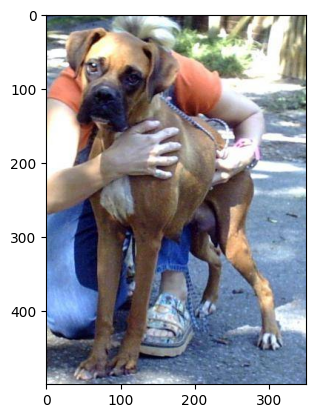

In [ ]:
# Displaying the images

img =  mpimg.imread('/content/train/dog.8877.jpg')
plt.imshow(img)

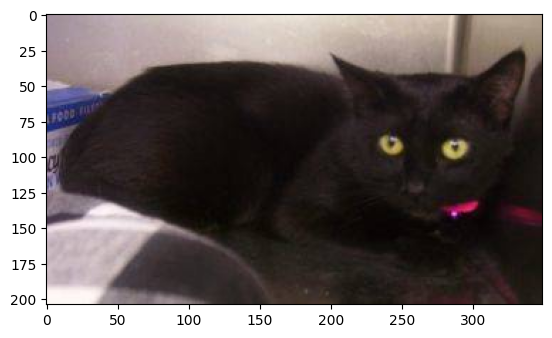

In [ ]:
img1 = mpimg.imread('/content/train/cat.10602.jpg')
plt.imshow(img1)

In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count +=1

print('Dog: ', dog_count)
print('Cat: ', cat_count)

Dog:  12500
Cat:  12500


In [ ]:
# Resizing the images for the pretrained model

os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)


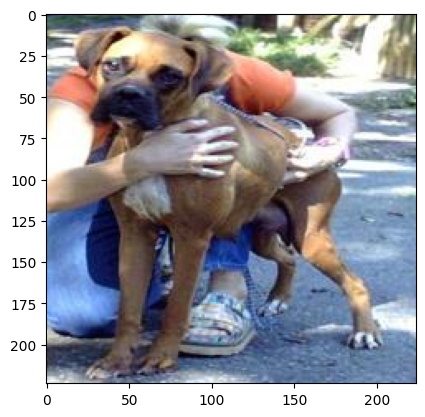

In [ ]:
img =  mpimg.imread('/content/image resized/dog.8877.jpg')
plt.imshow(img)

In [ ]:
# creating labels for resized images

cat = 0
dog = 1

In [ ]:
filenames = os.listdir('/content/image resized')

labels = []

for i in range(2000):

  filename = filenames[i]
  label = filename[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(labels[0:5])

['dog.8877.jpg', 'cat.10602.jpg', 'dog.2270.jpg', 'dog.5980.jpg', 'cat.10687.jpg']
[1, 0, 1, 1, 0]


In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [1004  996]


In [ ]:
# converting images to numpy arrays

import cv2
import glob

image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' +e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=3)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable=False)

In [ ]:
num_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [ ]:
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 37s 682ms/step - loss: 0.1783 - acc: 0.9337
Epoch 2/5
50/50 [==============================] - 36s 727ms/step - loss: 0.0685 - acc: 0.9787
Epoch 3/5
50/50 [==============================] - 36s 727ms/step - loss: 0.0535 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 37s 749ms/step - loss: 0.0426 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 40s 802ms/step - loss: 0.0348 - acc: 0.9925


In [ ]:
score, acc = model.evaluate(X_test, Y_test)

print('Loss: ', score)
print('Accuracy: ', acc)

13/13 [==============================] - 12s 745ms/step - loss: 0.0613 - acc: 0.9700
Loss:  0.061294201761484146
Accuracy:  0.9700000286102295


In [ ]:
# predictive system

input_image_path = input('Enter the path of the image to be predicted')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image =cv2.resize(input_image, (224,224))

input_image = np.reshape(input_image, [1,224,224,3])

input_prediction =- model.predict(input_image)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print("Image of a CAT")
else:
  print('Image of a Dog')

Output hidden; open in https://colab.research.google.com to view.